In [1]:
# setup
import hvplot.pandas
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt, date
import scipy.stats as st


Initial Analysis and Data Summary

In [2]:
#read sample csv
cc_data = pd.read_csv(r"C:\Users\corym\OneDrive\Documents\Data_Analytics_Bootcamp\GIT\Project_1_Group_3\cc_data.csv")
cc_data.head()

,Unnamed: 0,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,merch_lat,merch_long,gender
0,527442,2020-09-12 04:29:58,shopping_net,4.94,Darien,GA,31.3826,-81.4312,5989,1967-05-05,32.260016,-81.794484,F
1,538511,2020-09-17 18:28:09,shopping_pos,4.38,Mill Creek,PA,40.4679,-77.8967,1334,1986-12-17,39.472619,-78.244576,F
2,37539,2019-04-14 17:46:09,home,55.26,Centerview,MO,38.7897,-93.8702,2368,1989-07-17,39.199107,-93.423308,NaN
3,350429,2020-06-25 16:26:23,kids_pets,48.95,Indianapolis,IN,39.8490,-86.2720,910148,1975-11-30,39.685401,-87.064198,F
4,561460,2020-09-29 17:18:42,shopping_pos,348.15,Wilmington,NC,34.2651,-77.8670,186140,1983-02-08,34.268060,-78.504405,F


Examining data by location.

In [3]:
# Gather data for continental US for readable visual
continental_df=cc_data.loc[cc_data["state"]!="HI"]
continental_df.head()

,Unnamed: 0,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,merch_lat,merch_long,gender
0,527442,2020-09-12 04:29:58,shopping_net,4.94,Darien,GA,31.3826,-81.4312,5989,1967-05-05,32.260016,-81.794484,F
1,538511,2020-09-17 18:28:09,shopping_pos,4.38,Mill Creek,PA,40.4679,-77.8967,1334,1986-12-17,39.472619,-78.244576,F
2,37539,2019-04-14 17:46:09,home,55.26,Centerview,MO,38.7897,-93.8702,2368,1989-07-17,39.199107,-93.423308,NaN
3,350429,2020-06-25 16:26:23,kids_pets,48.95,Indianapolis,IN,39.8490,-86.2720,910148,1975-11-30,39.685401,-87.064198,F
4,561460,2020-09-29 17:18:42,shopping_pos,348.15,Wilmington,NC,34.2651,-77.8670,186140,1983-02-08,34.268060,-78.504405,F


In [4]:
continental_df_plot=continental_df.hvplot.points("long","lat",geo=True,tiles="OSM",color="gender",hover_cols=["state","category"])
continental_df_plot

c:\Users\corym\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
c:\Users\corym\anaconda3\Lib\site-packages\geoviews\operation\__init__.py:14: HoloviewsDeprecationWarning: 'ResamplingOperation' is deprecated and will be removed in version 1.18, use 'ResampleOperation2D' instead.
  from holoviews.operation.datashader import (
c:\Users\corym\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\corym\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\corym\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureW

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [long,lat]   (gender,state,category)

In [5]:
#victim location in contiguous US plot
contiguos_df=continental_df.loc[continental_df["state"]!="AK"]
contigous_plot=contiguos_df.hvplot.points("long","lat",geo=True,tiles="OSM",color="gender",hover_cols=["state","category"],title="Location of Fraud Victims by Gender")
plt.savefig("Victim_Location.png")
contigous_plot

c:\Users\corym\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\corym\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\corym\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\corym\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [long,lat]   (gender,state,category)

<Figure size 640x480 with 0 Axes>

In [6]:
#merchant location in contiguous US plot
contiguos_df=continental_df.loc[continental_df["state"]!="AK"]
contigous_plot=contiguos_df.hvplot.points("merch_long","merch_lat",geo=True,tiles="OSM",color="category",title="Location of Fraudulent Transactions by Category")
plt.savefig("Merchant_Location.png")
contigous_plot

c:\Users\corym\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\corym\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\corym\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\corym\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [merch_long,merch_lat]   (category)

<Figure size 640x480 with 0 Axes>

The correlation between City Population and transaction amounts is 0.01.


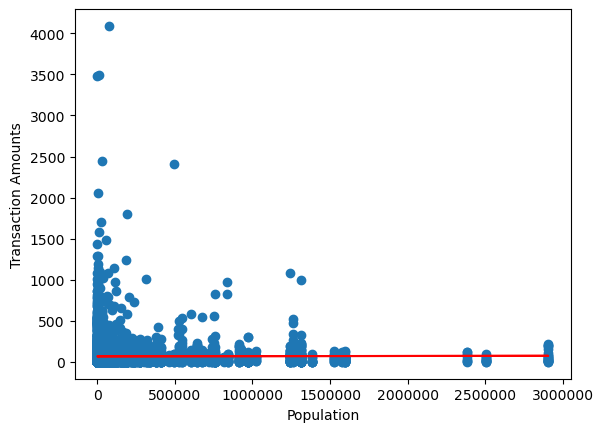

In [7]:
#scatter plot with linear regression of city population and transaction amounts
pop = cc_data['city_pop']
Amount = cc_data['amt']
correlation = st.pearsonr(pop, Amount)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(pop, Amount)
regression = pop * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(pop, Amount)
plt.plot(pop,regression,"r-")
plt.xlabel("Population")
plt.ylabel("Transaction Amounts")
print(f"The correlation between City Population and transaction amounts is {round(correlation[0], 2)}.")
plt.ticklabel_format(axis = 'x', style = 'plain')
plt.show()

In [8]:
# plot of fruadulent transacitons by gender and location
gender_plot=cc_data.hvplot.points("long","lat",geo=True,tiles="OSM",color="gender",hover_cols=["state","category"])
gender_plot

c:\Users\corym\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\corym\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\corym\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\corym\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [long,lat]   (gender,state,category)

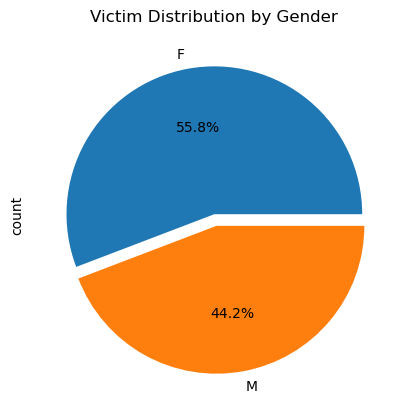

In [9]:
#percentage breakdown of fraud victims by Male and Female
gender_dis=cc_data["gender"].value_counts()
gender_dis.plot.pie(autopct="%1.1f%%",title="Victim Distribution by Gender",explode={0,.08})
plt.savefig("Gender_Distribution.png")
plt.show()

In [10]:
#isolate Birth Year
cc_data["dob"] = pd.to_datetime(cc_data["dob"])

cc_data['Birth Year'] = cc_data["dob"].dt.year.astype(int)

cc_data.head()

,Unnamed: 0,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,merch_lat,merch_long,gender,Birth Year
0,527442,2020-09-12 04:29:58,shopping_net,4.94,Darien,GA,31.3826,-81.4312,5989,1967-05-05,32.260016,-81.794484,F,1967
1,538511,2020-09-17 18:28:09,shopping_pos,4.38,Mill Creek,PA,40.4679,-77.8967,1334,1986-12-17,39.472619,-78.244576,F,1986
2,37539,2019-04-14 17:46:09,home,55.26,Centerview,MO,38.7897,-93.8702,2368,1989-07-17,39.199107,-93.423308,NaN,1989
3,350429,2020-06-25 16:26:23,kids_pets,48.95,Indianapolis,IN,39.8490,-86.2720,910148,1975-11-30,39.685401,-87.064198,F,1975
4,561460,2020-09-29 17:18:42,shopping_pos,348.15,Wilmington,NC,34.2651,-77.8670,186140,1983-02-08,34.268060,-78.504405,F,1983


In [11]:
#create generation data lists
silgen_list = []
boomer_list = []
genx_list = []
mill_list = []
genz_list = []
for i in cc_data["Birth Year"]:
    if i >= 1928 and i <= 1945:
        silgen_list.append(i)
    elif i >=1946 and i <= 1964:
        boomer_list.append(i)
    elif i >=1965 and i <= 1980:
        genx_list.append(i)
    elif i >=1981 and i <= 1996:
        mill_list.append(i)
    elif i >=1997 and i <=2010:
        genz_list.append(i)


In [12]:
#convert lists to int format to get counts
silgen_list = pd.Series(silgen_list).astype(int)
silgen_count = silgen_list.count()

boomer_list = pd.Series(boomer_list).astype(int)
boomer_count = boomer_list.count()

genx_list = pd.Series(genx_list).astype(int)
genx_count = genx_list.count()

mill_list = pd.Series(mill_list).astype(int)
mill_count = mill_list.count()

genz_list = pd.Series(genz_list).astype(int)
genz_count = genz_list.count()

In [13]:
#create DF of Generation Counts
generationcountdf = pd.DataFrame({"Silent":[silgen_count], "Baby Boomer": [boomer_count], "X": [genx_count], "Millenial": [mill_count], "Z":[genz_count]})
generationcountdf

,Silent,Baby Boomer,X,Millenial,Z
0,824,1898,3324,3223,662


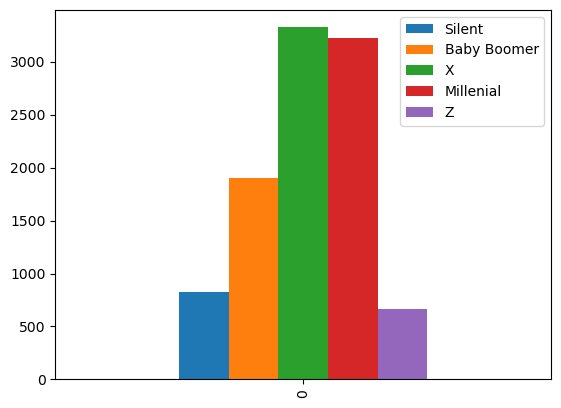

In [14]:
#create bar plot of generation data
generationbar = generationcountdf.plot.bar()

In [15]:
# find age
cc_data['age'] = 2024 - cc_data['Birth Year']



The correlation between age and transaction amounts is 0.01.


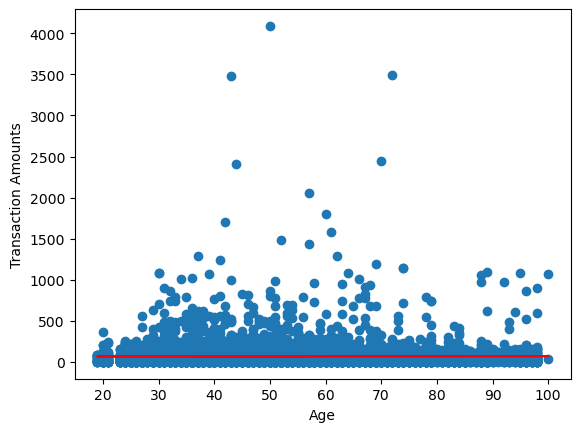

In [16]:
#create scatter plot with linear regression for age and transaction amount
Age = cc_data['age']
Amount = cc_data['amt']
correlation = st.pearsonr(Age, Amount)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Age, Amount)
regression = Age * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Age, Amount)
plt.plot(Age,regression,"r-")
plt.xlabel("Age")
plt.ylabel("Transaction Amounts")
print(f"The correlation between age and transaction amounts is {round(correlation[0], 2)}.")
plt.show()

In [17]:
base_category = pd.DataFrame(cc_data["category"].value_counts())
base_category_df = base_category.rename(index= {'gas_transport': 'Gas and Transport', 'home': 'Home', 'grocery_pos': 'Grocery (In Store)', 'shopping_pos': "Shopping (In Store)", 'kids_pets': 'Kids and Pets', 'entertainment': 'Entertainment', 'health_fitness': 'Health and Fitness', 'personal_care': 'Personal Care', 'food_dining': 'Food and Dining', 'shopping_net': 'Shopping (Online)', 'misc_pos': 'Misc (In Store)', 'misc_net': 'Misc (Online)', 'grocery_net': 'Grocery (Online)', 'travel': 'Travel'})
base_category_df

,count
category,
Gas and Transport,1002
Home,988
Shopping (In Store),928
Kids and Pets,899
Grocery (In Store),886
Entertainment,731
Shopping (Online),729
Food and Dining,716
Personal Care,679


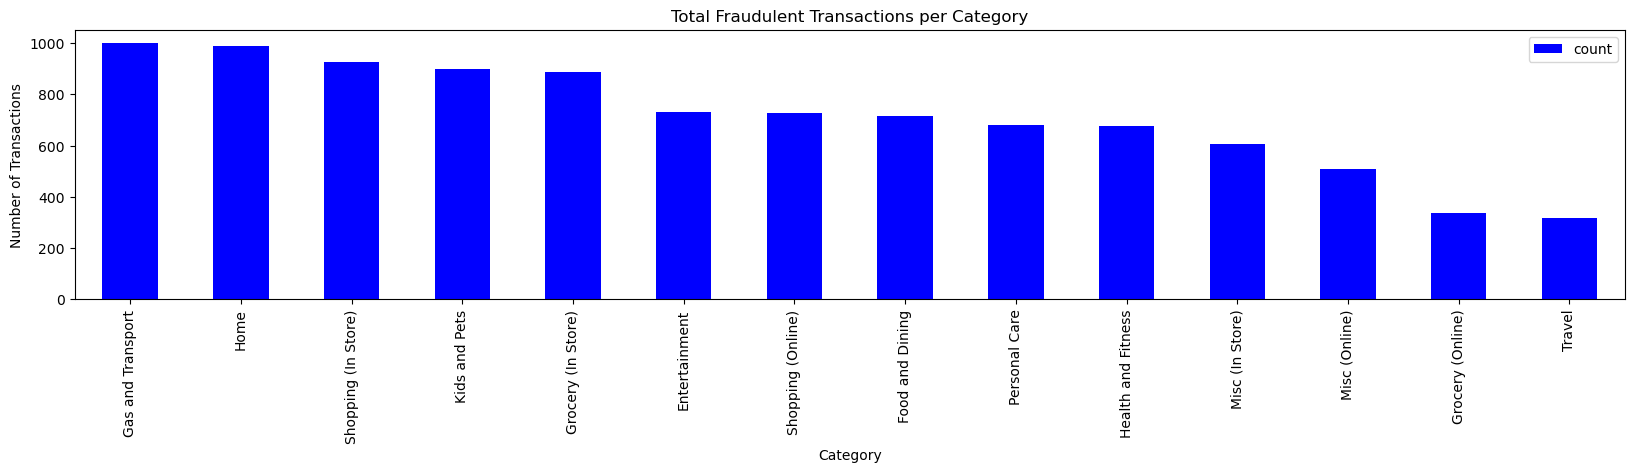

<Figure size 640x480 with 0 Axes>

In [18]:
#visualize counts of most frequent fraud transactions
category_bar = base_category_df.plot(kind="bar", color= 'b', figsize=(20,3.5))
plt.title("Total Fraudulent Transactions per Category")
plt.xlabel("Category")
plt.ylabel("Number of Transactions")
plt.show()
plt.tight_layout()

In [19]:
#group dataset by category
grouped_category_df = cc_data.groupby(["category"])
grouped_category_df.head(20)

,Unnamed: 0,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,merch_lat,merch_long,gender,Birth Year,age
0,527442,2020-09-12 04:29:58,shopping_net,4.94,Darien,GA,31.3826,-81.4312,5989,1967-05-05,32.260016,-81.794484,F,1967,57
1,538511,2020-09-17 18:28:09,shopping_pos,4.38,Mill Creek,PA,40.4679,-77.8967,1334,1986-12-17,39.472619,-78.244576,F,1986,38
2,37539,2019-04-14 17:46:09,home,55.26,Centerview,MO,38.7897,-93.8702,2368,1989-07-17,39.199107,-93.423308,NaN,1989,35
3,350429,2020-06-25 16:26:23,kids_pets,48.95,Indianapolis,IN,39.8490,-86.2720,910148,1975-11-30,39.685401,-87.064198,F,1975,49
4,561460,2020-09-29 17:18:42,shopping_pos,348.15,Wilmington,NC,34.2651,-77.8670,186140,1983-02-08,34.268060,-78.504405,F,1983,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,169451,2019-12-30 22:42:10,travel,6.82,Meredith,CO,39.3199,-106.6596,61,1939-11-04,40.175680,-106.515999,NaN,1939,85
453,351641,2020-06-26 09:23:27,grocery_net,48.50,Lanark Village,FL,29.8826,-84.5964,217,1990-01-24,29.028554,-84.619250,F,1990,34
455,331216,2020-12-21 19:02:33,travel,6.24,Freedom,WY,43.0172,-111.0292,471,1967-08-02,42.661155,-111.288003,M,1967,57
501,663852,2020-11-23 21:57:39,travel,465.44,Acworth,NH,43.1960,-72.3001,477,1988-04-15,43.737342,-72.843261,M,1988,36


In [20]:
#find the total dollar amoutn of fraudulent transactions by category
category_amt = grouped_category_df['amt'].sum()
cleaned_category_amt = category_amt.rename(index= {'gas_transport': 'Gas and Transport', 'home': 'Home', 'grocery_pos': 'Grocery (In Store)', 'shopping_pos': "Shopping (In Store)", 'kids_pets': 'Kids and Pets', 'entertainment': 'Entertainment', 'health_fitness': 'Health and Fitness', 'personal_care': 'Personal Care', 'food_dining': 'Food and Dining', 'shopping_net': 'Shopping (Online)', 'misc_pos': 'Misc (In Store)', 'misc_net': 'Misc (Online)', 'grocery_net': 'Grocery (Online)', 'travel': 'Travel'})
cleaned_category_amt

category
Entertainment           48623.11
Food and Dining         35648.18
Gas and Transport       64201.20
Grocery (Online)        17783.95
Grocery (In Store)     106739.13
Health and Fitness      35715.38
Home                    59137.60
Kids and Pets           51577.50
Misc (Online)           42392.47
Misc (In Store)         40550.04
Personal Care           33331.41
Shopping (Online)       57975.29
Shopping (In Store)     67905.99
Travel                  30210.79
Name: amt, dtype: float64

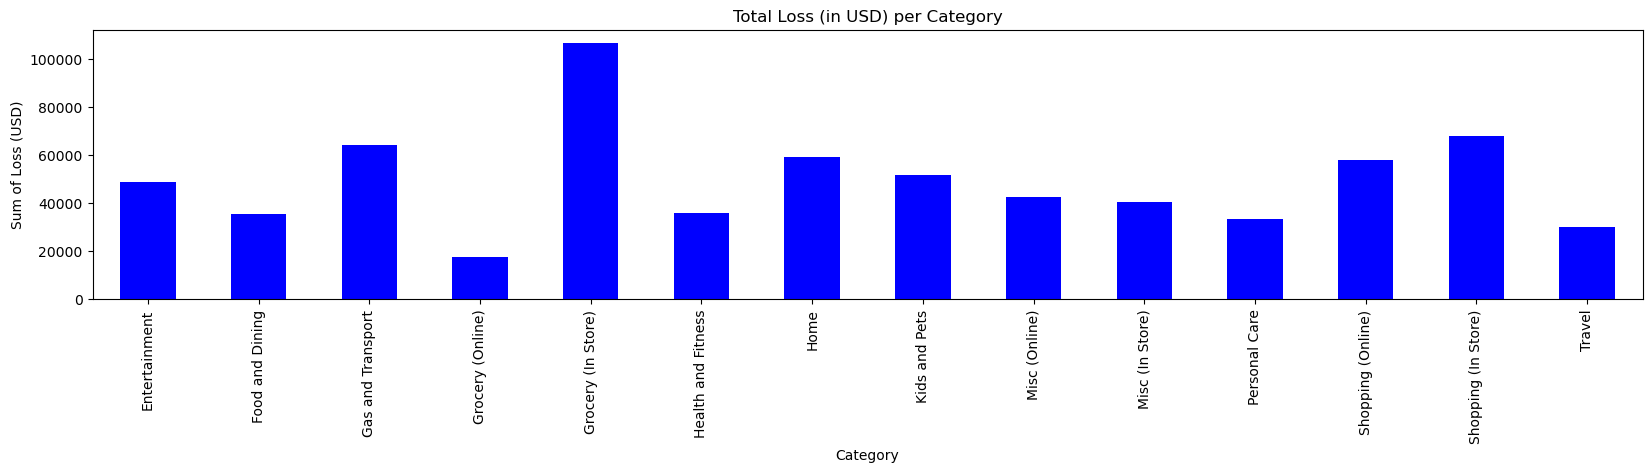

<Figure size 640x480 with 0 Axes>

In [21]:
#visualize breakdown of total amount of fraudulent transactions by category
category_totals_bar = cleaned_category_amt.plot(kind="bar", color= 'b', figsize=(20,3.5))
plt.title("Total Loss (in USD) per Category")
plt.xlabel("Category")
plt.ylabel("Sum of Loss (USD)")
plt.show()
plt.tight_layout()

In [22]:
#Creating Trans Month Column
cc_data["trans_date_trans_time"] = pd.to_datetime(cc_data["trans_date_trans_time"])
cc_data['Trans Month'] = cc_data["trans_date_trans_time"].dt.month.astype(int)
cc_data.head()

,Unnamed: 0,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,merch_lat,merch_long,gender,Birth Year,age,Trans Month
0,527442,2020-09-12 04:29:58,shopping_net,4.94,Darien,GA,31.3826,-81.4312,5989,1967-05-05,32.260016,-81.794484,F,1967,57,9
1,538511,2020-09-17 18:28:09,shopping_pos,4.38,Mill Creek,PA,40.4679,-77.8967,1334,1986-12-17,39.472619,-78.244576,F,1986,38,9
2,37539,2019-04-14 17:46:09,home,55.26,Centerview,MO,38.7897,-93.8702,2368,1989-07-17,39.199107,-93.423308,NaN,1989,35,4
3,350429,2020-06-25 16:26:23,kids_pets,48.95,Indianapolis,IN,39.8490,-86.2720,910148,1975-11-30,39.685401,-87.064198,F,1975,49,6
4,561460,2020-09-29 17:18:42,shopping_pos,348.15,Wilmington,NC,34.2651,-77.8670,186140,1983-02-08,34.268060,-78.504405,F,1983,41,9


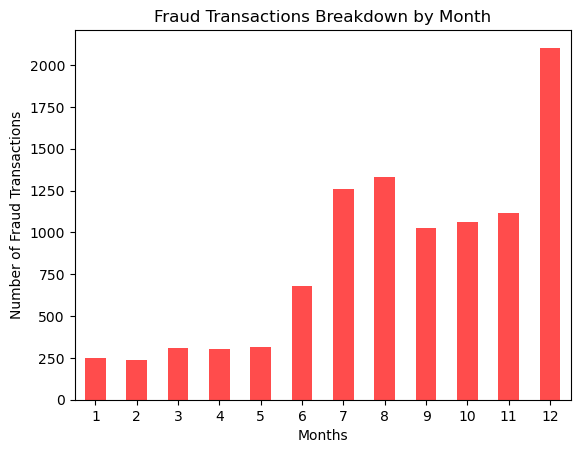

In [23]:
# Group by 'Trans Month' and count the number of fraud transactions in each month
fraud_by_month = cc_data.groupby('Trans Month').size()
title = "Fraud Transactions Breakdown by Month"
# Create a bar graph
fraud_by_month.plot(kind='bar', color='red', alpha=0.7)
plt.title(title)
plt.xlabel('Months')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.show()

In [24]:
#create variables for time breakdown
cc_data[['trans_date', 'trans_time']] = cc_data['trans_date_trans_time'].str.split(' ', n=1, expand=True)
cc_data[["hour","min:sec"]]=cc_data["trans_time"].str.split(":",n=1,expand=True)
cc_data.head()

AttributeError: Can only use .str accessor with string values!

In [ ]:
# Group by 'hour' and count the number of fraud transactions for each hour of the day
fraud_by_tod = cc_data.groupby('hour').size()
fraud_by_tod=pd.DataFrame(fraud_by_tod)

title = "Fraud Transactions Breakdown by Time of Day"
# Create a bar graph
fraud_by_tod.plot(kind='bar', color='red', alpha=0.7)
plt.title(title)
plt.xlabel('Time of Day')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.savefig("TOD_breakdown.png")
plt.show()

KeyError: 'hour'